<a href="https://colab.research.google.com/github/mentor-pranaya/Fake_news_identification_Infosys_Internship_Oct2024/blob/Pratham-Moodbidri/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/drive/MyDrive/Projects/Fake News Project/Fake News Dataset.xlsx'
df = pd.read_excel(file_path)
df.head()

,Title,Author,Description,URL,Category,Date,True/False
0,Teen Mom Star Jenelle Evans' Wedding Dress Is ...,NaN,NaN,https://www.brides.com/story/teen-mom-jenelle-...,NaN,NaN,True
1,Kylie Jenner refusing to discuss Tyga on Life ...,NaN,NaN,https://www.dailymail.co.uk/tvshowbiz/article-...,NaN,NaN,True
2,Quinn Perkins,NaN,NaN,https://en.wikipedia.org/wiki/Quinn_Perkins,NaN,NaN,True
3,I Tried Kim Kardashian's Butt Workout & Am For...,NaN,NaN,https://www.refinery29.com/en-us/2018/03/19192...,NaN,NaN,True
4,Celine Dion donates concert proceeds to Vegas ...,NaN,NaN,https://www.cnn.com/2017/10/04/entertainment/c...,NaN,NaN,True


In [ ]:
print(f'Total rows: {df.shape[0]}, Total columns: {df.shape[1]}')

Total rows: 123067, Total columns: 7


In [ ]:
print(df.isnull().sum())

Title            8041
Author         101694
Description     35367
URL            100201
Category       123067
Date            63652
True/False       4570
dtype: int64


# Removing unwanted Columns and Data, and cleaning

In [ ]:
df = df.drop(['Author', 'URL', 'Category'], axis=1)

In [ ]:
df = df.dropna(subset=['Title', 'Description'], how='all')

In [ ]:
df['Date'] = df['Date'].fillna('Unknown')

In [ ]:
df['Title'] = df['Title'].fillna('Missing')
df['Description'] = df['Description'].fillna('Missing')

In [ ]:
df['True/False'] = df['True/False'].fillna('Unknown')

In [ ]:
mapping = {
    'TRUE': 'Real',
    'Real': 'Real',
    'REAL': 'Real',
    1: 'Real',
    'FALSE': 'Fake',
    'Fake': 'Fake',
    'FAKE': 'Fake',
    0: 'Fake'
}
df['True/False'] = df['True/False'].map(mapping).fillna('Unknown')
print(df['True/False'].unique())

['Real' 'Fake' 'Unknown']


In [ ]:
df = df.rename(columns={'True/False': 'Label'})

In [ ]:
df['Title'] = df['Title'].astype(str)
df['Description'] = df['Description'].astype(str)
df['text'] = df['Title'] + " " + df['Description']
df = df.drop(['Title', 'Description'], axis=1)

In [31]:
print(df.head())

      Date Label                                               text
0  Unknown  Real  Teen Mom Star Jenelle Evans' Wedding Dress Is ...
1  Unknown  Real  Kylie Jenner refusing to discuss Tyga on Life ...
2  Unknown  Real                              Quinn Perkins Missing
3  Unknown  Real  I Tried Kim Kardashian's Butt Workout & Am For...
4  Unknown  Real  Celine Dion donates concert proceeds to Vegas ...


In [33]:
print(df.isnull().sum())
print(f'Total rows: {df.shape[0]}, Total columns: {df.shape[1]}')

Date     0
Label    0
text     0
dtype: int64
Total rows: 116300, Total columns: 3


In [34]:
!pip install openpyxl

In [35]:
df.to_excel('/content/cleaned_fake_news_dataset.xlsx', index=False)

In [36]:
files.download('/content/cleaned_fake_news_dataset.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
df = df.drop(['Date'], axis=1)
print(df.head())

  Label                                               text
0  Real  Teen Mom Star Jenelle Evans' Wedding Dress Is ...
1  Real  Kylie Jenner refusing to discuss Tyga on Life ...
2  Real                              Quinn Perkins Missing
3  Real  I Tried Kim Kardashian's Butt Workout & Am For...
4  Real  Celine Dion donates concert proceeds to Vegas ...


In [39]:
print(df.dtypes)
print(df['Label'].value_counts())
print(df.describe())

Label    object
text     object
dtype: object
Label
Fake       58498
Real       54226
Unknown     3576
Name: count, dtype: int64
         Label                                               text
count   116300                                             116300
unique       3                                              94059
top       Fake  Highest IPL score in Dubai\n\nMilestones to wa...
freq     58498                                                 79


In [40]:
df = df[df['Label'] != 'Unknown']

In [41]:
print(df.dtypes)
print(df['Label'].value_counts())
print(df.describe())

Label    object
text     object
dtype: object
Label
Fake    58498
Real    54226
Name: count, dtype: int64
         Label                                               text
count   112724                                             112724
unique       2                                              90779
top       Fake  Highest IPL score in Dubai\n\nMilestones to wa...
freq     58498                                                 79


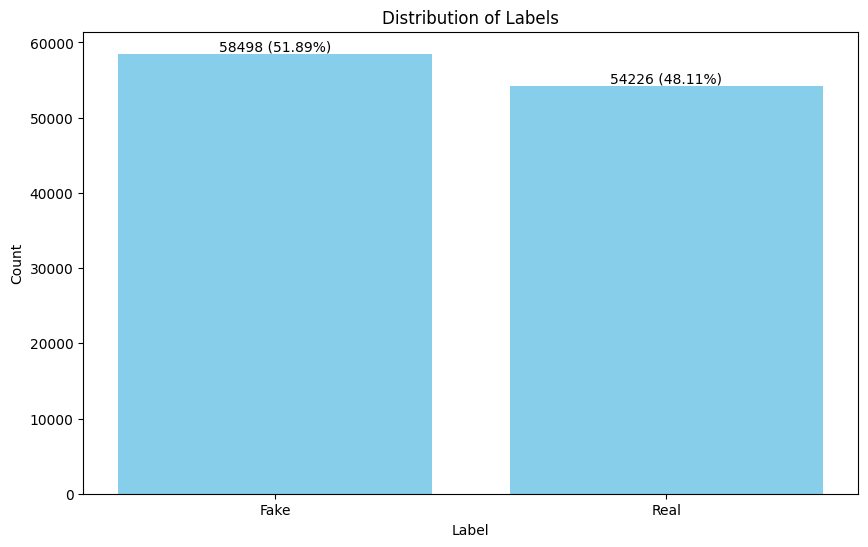

In [57]:
import matplotlib.pyplot as plt
label_counts = df['Label'].value_counts()
label_ratios = label_counts / label_counts.sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.index, label_counts.values, color='skyblue')

plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')

for bar in bars:
    height = bar.get_height()
    label = bar.get_x() + bar.get_width() / 2
    ratio = label_ratios[label_counts.index[int(label)]]
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height} ({ratio:.2%})',
             ha='center', va='bottom')

plt.show()


# Data Preprocessing

In [43]:
df.loc[:, 'text'] = df['text'].str.lower()

In [44]:
df.loc[:, 'text'] = df['text'].str.replace(r'[^\w\s]', '', regex=True)

In [45]:
df.loc[:, 'text'] = df['text'].str.replace(r'\d+', '', regex=True)

In [46]:
print(df['text'].head())

0    teen mom star jenelle evans wedding dress is a...
1    kylie jenner refusing to discuss tyga on life ...
2                                quinn perkins missing
3    i tried kim kardashians butt workout  am forev...
4    celine dion donates concert proceeds to vegas ...
Name: text, dtype: object


In [48]:
import pandas as pd
from nltk.tokenize import word_tokenize

df.loc[:, 'tokens'] = df['text'].apply(word_tokenize)

print(df[['text', 'tokens']].head())

                                                text  \
0  teen mom star jenelle evans wedding dress is a...   
1  kylie jenner refusing to discuss tyga on life ...   
2                              quinn perkins missing   
3  i tried kim kardashians butt workout  am forev...   
4  celine dion donates concert proceeds to vegas ...   

                                              tokens  
0  [teen, mom, star, jenelle, evans, wedding, dre...  
1  [kylie, jenner, refusing, to, discuss, tyga, o...  
2                          [quinn, perkins, missing]  
3  [i, tried, kim, kardashians, butt, workout, am...  
4  [celine, dion, donates, concert, proceeds, to,...  


In [50]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df.loc[:, 'tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df.loc[:, 'tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [53]:
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')

stemmer = PorterStemmer()

df.loc[:, 'tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
print(df.head())

  Label                                               text  \
0  Real  teen mom star jenelle evans wedding dress is a...   
1  Real  kylie jenner refusing to discuss tyga on life ...   
2  Real                              quinn perkins missing   
3  Real  i tried kim kardashians butt workout  am forev...   
4  Real  celine dion donates concert proceeds to vegas ...   

                                              tokens  
0  [teen, mom, star, jenel, evan, wed, dress, ava...  
1  [kyli, jenner, refus, discu, tyga, life, kyli,...  
2                              [quinn, perkin, miss]  
3  [tri, kim, kardashian, butt, workout, forev, c...  
4  [celin, dion, donat, concert, proce, vega, sho...  


In [65]:
df.loc[:, 'label'] = df['Label'].map({'Real': 1, 'Fake': 0})

y = df['label']
print(y.value_counts())
total_count = len(df)
print(f'Total count of rows in the DataFrame: {total_count}')

label
0.0    58498
1.0    54226
Name: count, dtype: int64
Total count of rows in the DataFrame: 112724
